## Logistic Regression as Neural Net



In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from utils import load_dataset
import pandas as pd
import utils

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [3]:
# try to see the dataset, see the shapes and explore its properties
for each in [train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes]:
    print(each.shape)
print(classes)



(209, 64, 64, 3)
(1, 209)
(50, 64, 64, 3)
(1, 50)
(2,)
[b'non-cat' b'cat']


* as we see above we have two classes 0 - non cat and 1 - cat
* we have 209 examples of training feature examples train_set_X and labels train_y
* we have 50 examles of test sets
* shape of X_train is (m, 64, 64, 3)
* each example feature has a shape of (64, 64, 3)
* the image has three channels R, G, B 64 X 64 pixels each 

* shape of labels is 1 X m

This is cat


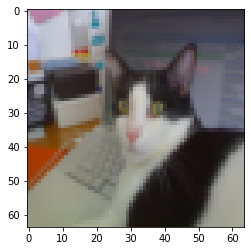

In [4]:
# let as see sample of a picture
idx = 111
plt.imshow(train_set_x_orig[idx])
print("This is", classes[train_set_y[0, idx]].decode('utf-8'))

In [98]:
from logistic_regression import LogisticRegression

In [99]:
train_X, test_X = utils.flat_image(train_set_x_orig), utils.flat_image(test_set_x_orig)

In [100]:
clf = LogisticRegression(max_iter=100)
clf.fit(train_X, train_set_y)

In [101]:
clf.score(train_X, train_set_y)

1.0

In [102]:
# Score on test set 
clf.score(test_X, test_set_y)

0.72

In [78]:
# Try out different lambda values
score = [0]
lambda_ = 0
for each in np.linspace(0, 4, 10):
    clf = LogisticRegression(lambda_=each)
    clf.fit(train_X, train_set_y)
    s = np.mean(clf.predict(test_X) == test_set_y)
    if s > max(score):
        lambda_ = each
        print(s, 'At lambda', lambda_)
    score.append(s)
print("_"*20)
print("Best Lambda: ", lambda_)
    
    


0.72 At lambda 0.0
____________________
Best Lambda:  0.0


This is non-cat


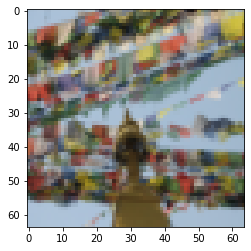

In [81]:
# let as see sample of a picture
idx = 113
plt.imshow(train_set_x_orig[idx])
print("This is", classes[clf.predict(train_X)[0, idx]].decode('utf-8'))